<a href="https://colab.research.google.com/github/gziz/mars-routes/blob/main/mars_traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mars Traversal

# Libraries

In [ ]:
!pip install simpleai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.2 MB/s 
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=101000 sha256=9c78bebb041ec16df5e035115c91033f10d366bc9ac48a73d19ec558e7eab207
  Stored in directory: /root/.cache/pip/wheels/9a/d1/3b/ef0fc9aee7197e62482fc629181119aaacb684225057516de3
Successfully built simpleai


In [ ]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from simpleai.search import SearchProblem
from simpleai.search.traditional import astar, depth_first, breadth_first, greedy

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mars_map = np.load('/content/DATA/mars_map.npy')
n_rows, n_cols = mars_map.shape
print('Img size: ', n_rows, n_cols)

Img size:  1815 756


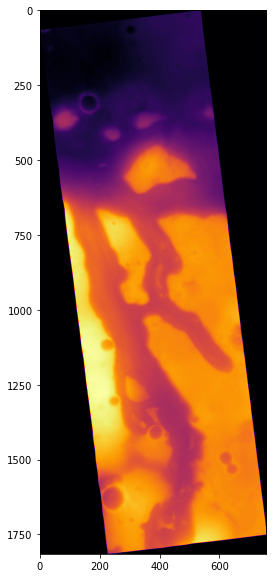

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.show()

# Helper Functions

In [ ]:
# Función para pasar de coordenadas x-y a coordenadas imagen
def xy_to_img(obj_x_y):
    x = obj_x_y[0]
    y = obj_x_y[1]
    return  (n_rows-round(y/10.0174), round(x/10.0174))

In [ ]:
p0 = (2850,6400)
p1 = (3150, 6800)

INIT_STATE = xy_to_img(p0)
GOAL = xy_to_img(p1)
max_dif_h = 0.25

print("Estado inicial: ", INIT_STATE)
print("Goal: ", GOAL)

Estado inicial:  (1176, 285)
Goal:  (1136, 314)


In [ ]:
class MarsRoverProblem(SearchProblem):

    def __init__(self, goal, **kwds):
       super(MarsRoverProblem, self).__init__(**kwds)
       self.goal = goal

    def actions(self, state):

        x = state[0]
        y = state[1]
        h0 = mars_map[x,y]
        list_actions = []

        movements = [[-1, 1], [0, 1], [1,1],
                     [-1, 0], [1, 0],
                     [-1,-1], [0,-1], [1,-1]]                                
                     
        for movement in movements:
            
            new_x, new_y = x + movement[0], y + movement[1]           
            h = mars_map[new_x, new_y]

            if abs(h-h0) < max_dif_h and h!=-1.0:
                list_actions.append([new_x,new_y])

        return list_actions


    def result(self, state, action):
        return tuple([action[0], action[1]])


    def is_goal(self, state):
        return state == self.goal


    def cost(self, state, action, state2):
        return 1


    def heuristic(self, state):
        euclidean = math.sqrt( (state[0]-self.goal[0])**2 + (state[1]-self.goal[1])**2 )
        return euclidean

# Uninformed Search Strategies

## Breath First Search

In [ ]:
mars_problem = MarsRoverProblem(initial_state=INIT_STATE, goal = GOAL)
t1 = time.time()
result = breadth_first(mars_problem, graph_search=True)
tiempo_breadth =  time.time()-t1
distancia_breadth = len(result.path())
print("Time: ", tiempo_breadth, " seconds")
print("Travelled distance: ", distancia_breadth*10, " meters")

Time:  4.657718658447266  seconds
Travelled distance:  3090  meters


In [ ]:
# Transforme to x, y coordinates
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])

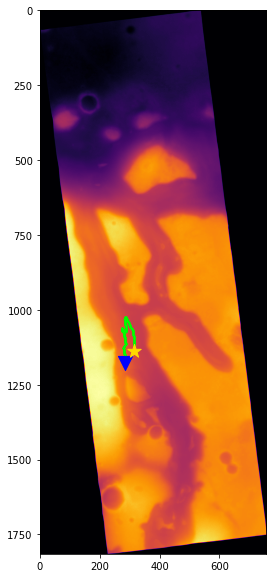

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.scatter(cols, rows, c='lime', s=1)
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='blue', marker='v', s=200)
plt.scatter([GOAL[1]], [GOAL[0]], c='gold', marker='*', s=200)
plt.show()

## Depth First Search

In [ ]:
mars_problem = MarsRoverProblem(initial_state=INIT_STATE, goal = GOAL)
t1 = time.time()
result = depth_first(mars_problem, graph_search=True)
tiempo_depth =  time.time()-t1
distancia_depth = len(result.path())
print("Time: ", tiempo_depth, " seconds")
print("Travelled distance: ", distancia_depth*10, " meters")

Time:  65.0259108543396  seconds
Travelled distance:  124090  meters


In [ ]:
# Transforme to x, y coordinates
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])

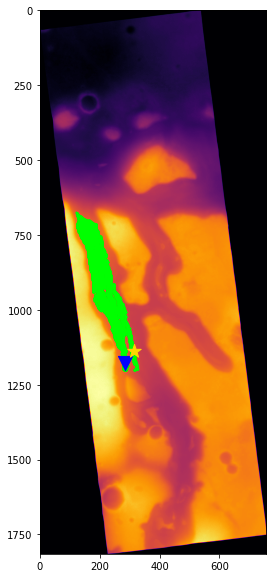

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.scatter(cols, rows, c='lime', s=1)
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='blue', marker='v', s=200)
plt.scatter([GOAL[1]], [GOAL[0]], c='gold', marker='*', s=200)
plt.show()

# Informed Search Strategies

## A star

In [ ]:
mars_problem = MarsRoverProblem(initial_state=INIT_STATE, goal = GOAL)

t1 = time.time()
result = astar(mars_problem, graph_search=True)
tiempo_astar =  time.time()-t1
distancia_astar = len(result.path())
print("Time: ", tiempo_astar, " seconds")
print("Travelled distance: ", distancia_astar*10, " meters")

Time:  0.6816205978393555  seconds
Travelled distance:  3090  meters


In [ ]:
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])

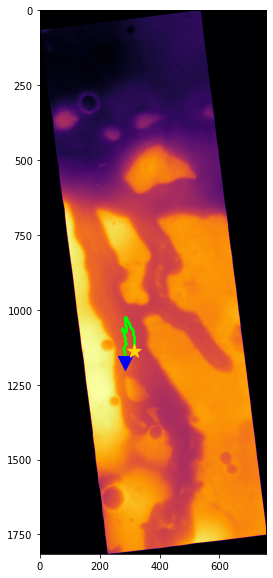

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.scatter(cols, rows, c='lime', s=1)
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='blue', marker='v', s=200)
plt.scatter([GOAL[1]], [GOAL[0]], c='gold', marker='*', s=200)
plt.show()

## Greedy

In [ ]:
mars_problem = MarsRoverProblem(initial_state=INIT_STATE, goal = GOAL)

t1 = time.time()
result = greedy(mars_problem, graph_search=True)
tiempo_astar =  time.time()-t1
distancia_astar = len(result.path())
print("Time: ", tiempo_astar, " seconds")
print("Travelled distance: ", distancia_astar*10, " meters")

Time:  0.7308621406555176  seconds
Travelled distance:  3770  meters


In [ ]:
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])

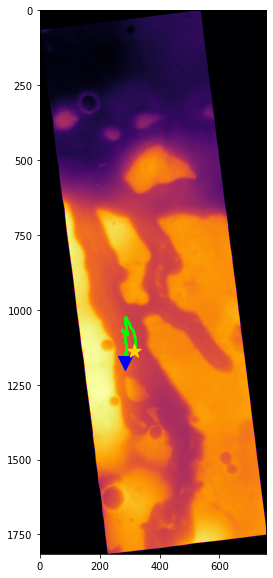

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(mars_map, cmap='inferno')
plt.scatter(cols, rows, c='lime', s=1)
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='blue', marker='v', s=200)
plt.scatter([GOAL[1]], [GOAL[0]], c='gold', marker='*', s=200)
plt.show()